In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv(r"/content/New Text Document (2).txt")


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-01,46311.746094,47827.312500,46288.484375,47686.812500,47686.812500,24582667004
1,2022-01-02,47680.925781,47881.406250,46856.937500,47345.218750,47345.218750,27951569547
2,2022-01-03,47343.542969,47510.726563,45835.964844,46458.117188,46458.117188,33071628362
3,2022-01-04,46458.851563,47406.546875,45752.464844,45897.574219,45897.574219,42494677905
4,2022-01-05,45899.359375,46929.046875,42798.222656,43569.003906,43569.003906,36851084859


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35 non-null     int64  
 1   Open       35 non-null     float64
 2   High       35 non-null     float64
 3   Low        35 non-null     float64
 4   Close      35 non-null     float64
 5   Adj Close  35 non-null     float64
 6   Volume     35 non-null     int64  
dtypes: float64(5), int64(2)
memory usage: 2.0 KB


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3.500000e+01,35.000000,35.000000,35.000000,35.000000,35.000000,3.500000e+01
mean,2.022013e+07,40966.132032,41617.007031,39824.987165,40715.636831,40715.636831,2.865720e+10
std,2.920191e+01,3549.048571,3518.504634,3666.941410,3469.736601,3469.736601,1.278892e+10
min,2.022010e+07,35047.359375,36433.312500,33184.058594,35030.250000,35030.250000,1.464355e+10
25%,2.022011e+07,37507.386719,38421.300782,36554.556641,37401.968750,37401.968750,2.086124e+10
50%,2.022012e+07,41744.027344,42478.304688,40672.824219,41733.941406,41733.941406,2.504143e+10
75%,2.022013e+07,43135.845704,43580.740235,42488.015625,43106.789062,43106.789062,3.258793e+10
max,2.022020e+07,47680.925781,47881.406250,46856.937500,47686.812500,47686.812500,8.419661e+10


In [ ]:
df.shape

(35, 7)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f32d90d2dd0>,
      dtype=object)

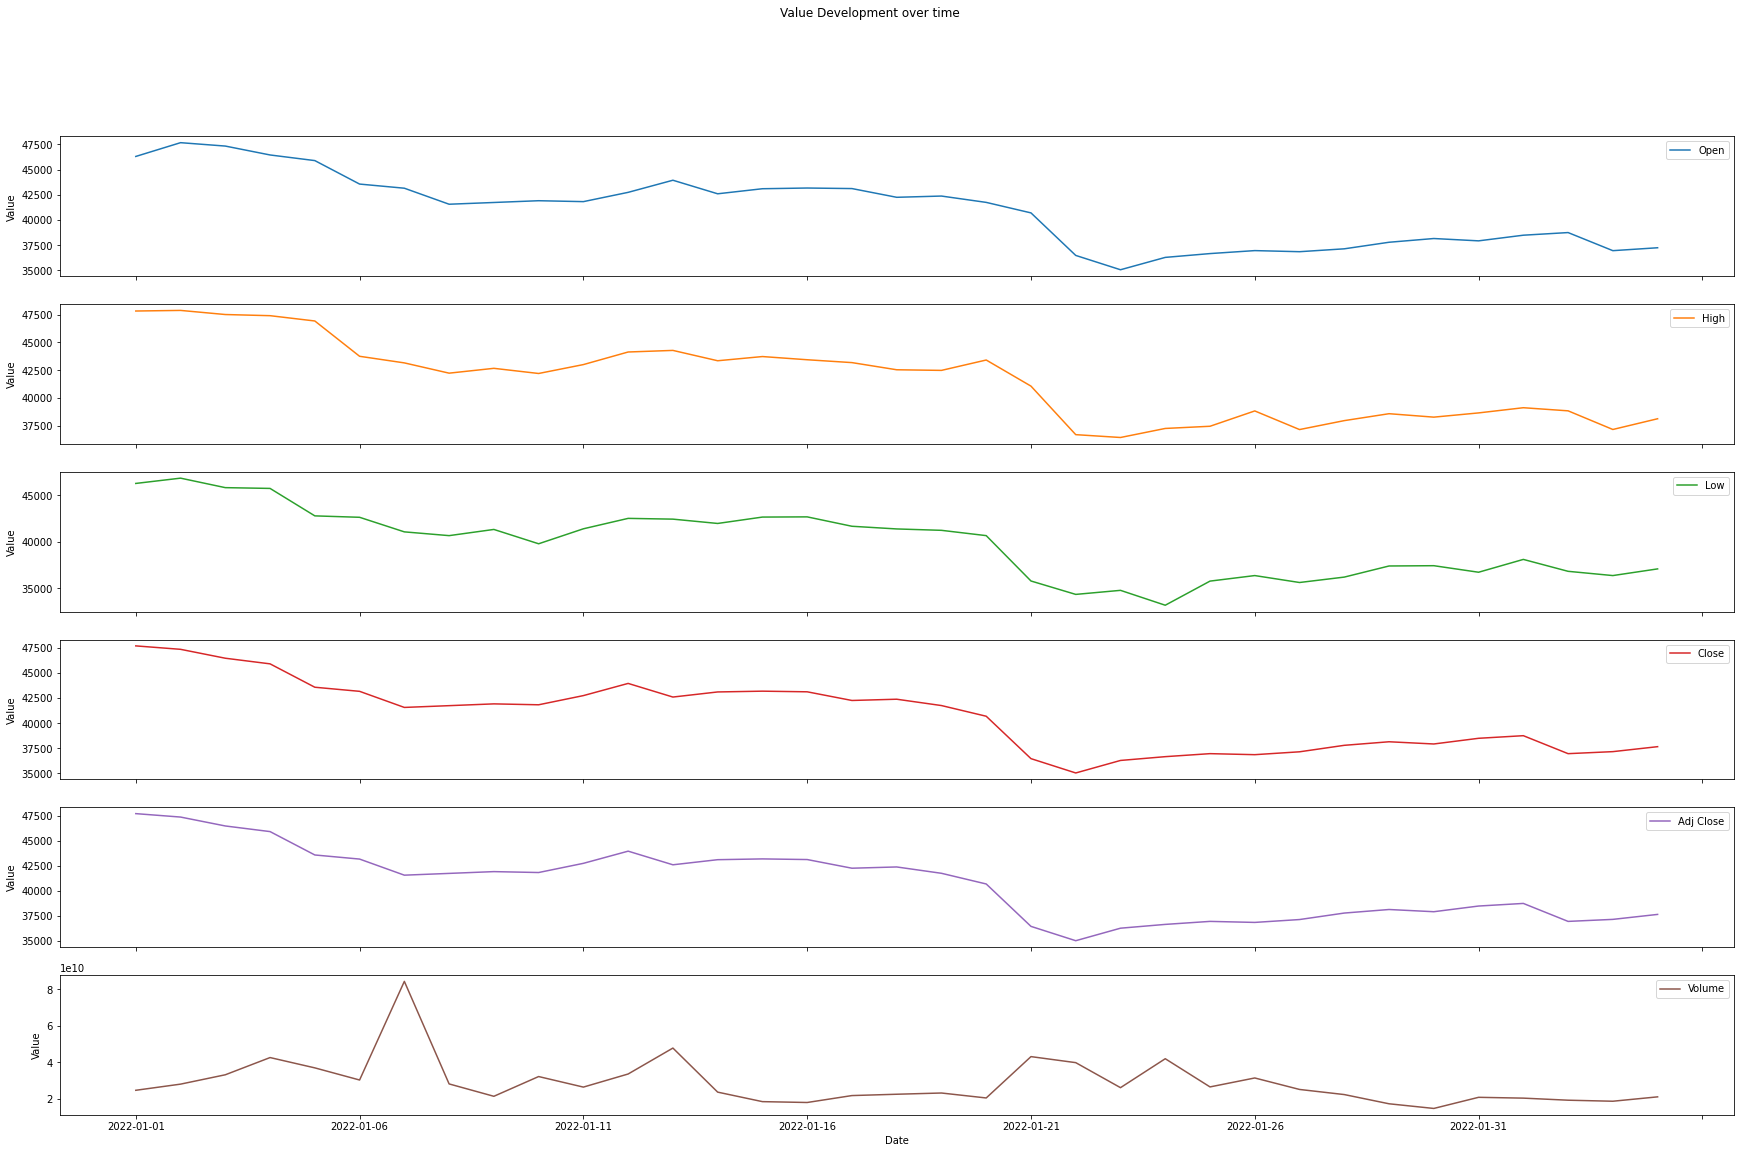

In [ ]:
df.plot(subplots = True, x = "Date", title = "Value Development over time", xlabel = "Date", ylabel = "Value", figsize = (30, 18))

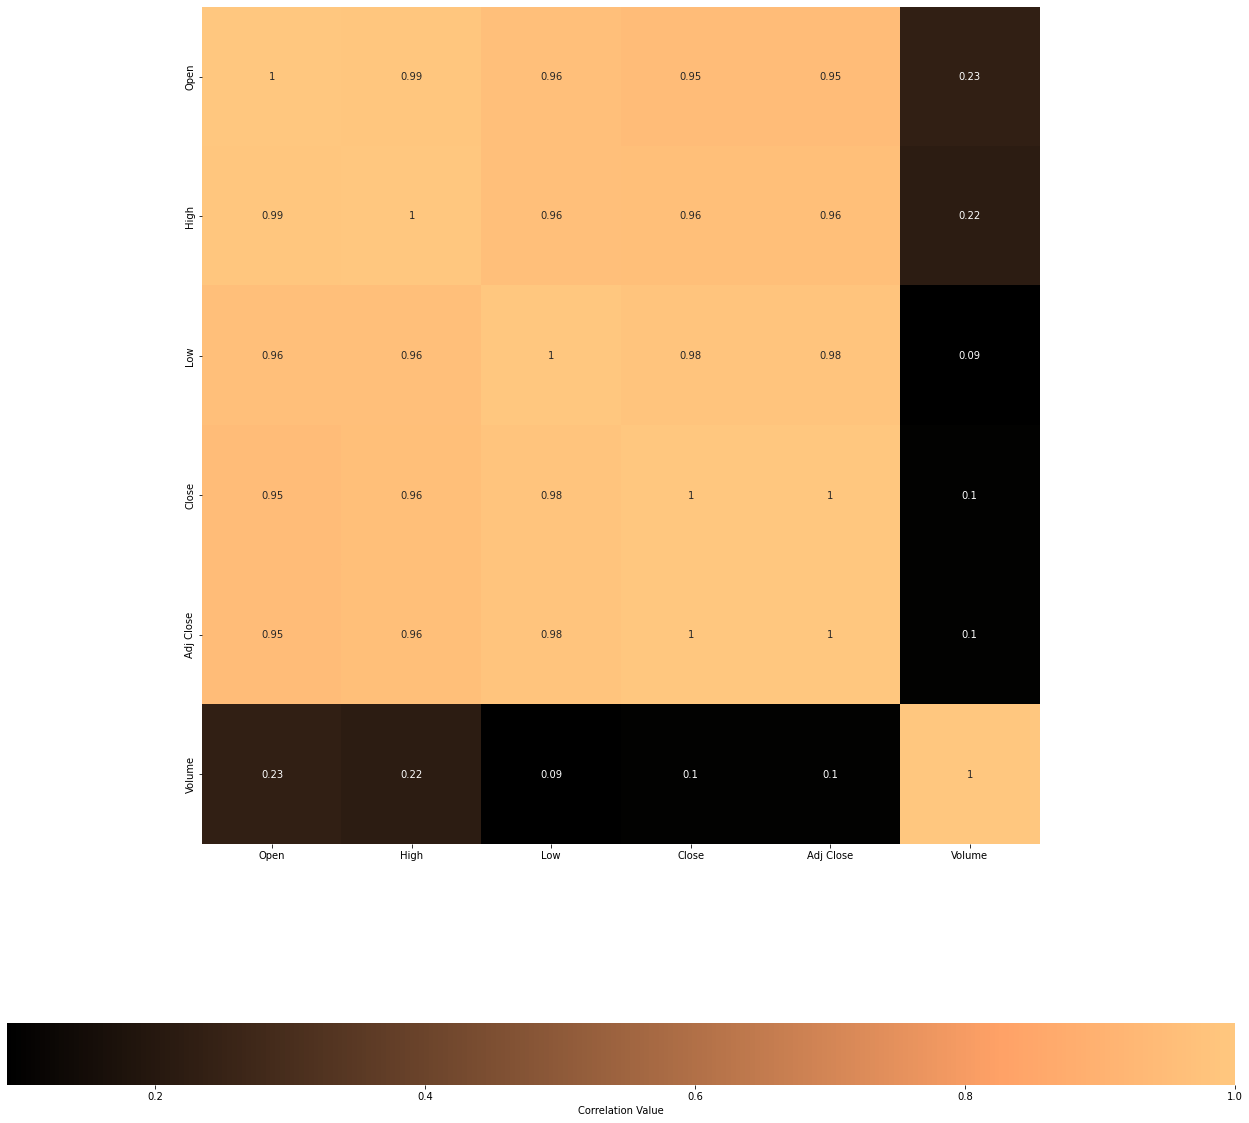

In [ ]:
df.corr()
corrmat = df.corr()
plt.subplots(figsize = (22, 22))
sns.heatmap(corrmat,cmap = "copper",annot = True, square = True, cbar_kws = {'label': 'Correlation Value', 'orientation': 'horizontal'});

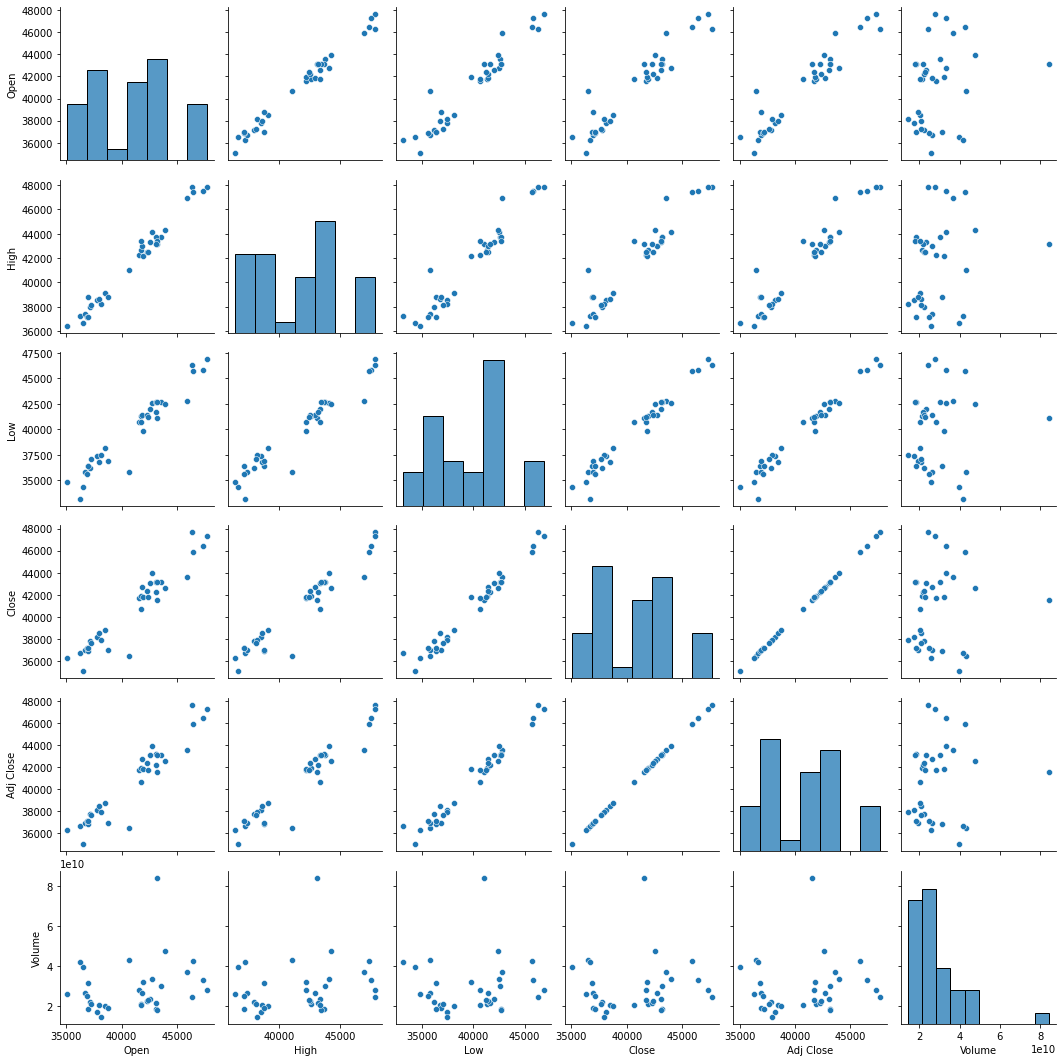

In [ ]:
sns.pairplot(df, palette = "flag")

In [ ]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
df['Date']=df['Date'].str.replace('-','').astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["Date"]=lb.fit_transform(df["Date"])

In [ ]:
target=df["Close"]
target

0     47686.812500
1     47345.218750
2     46458.117188
3     45897.574219
4     43569.003906
5     43160.929688
6     41557.902344
7     41733.941406
8     41911.601563
9     41821.261719
10    42735.855469
11    43949.101563
12    42591.570313
13    43099.699219
14    43177.398438
15    43113.878906
16    42250.550781
17    42375.632813
18    41744.328125
19    40680.417969
20    36457.316406
21    35030.250000
22    36276.804688
23    36654.328125
24    36954.003906
25    36852.121094
26    37138.234375
27    37784.332031
28    38138.179688
29    37917.601563
30    38483.125000
31    38743.273438
32    36952.984375
33    37154.601563
34    37649.335938
Name: Close, dtype: float64

In [ ]:
predictor=df.loc[:,df.columns!='Close']
predictor

,Date,Open,High,Low,Adj Close,Volume
0,0,46311.746094,47827.312500,46288.484375,47686.812500,24582667004
1,1,47680.925781,47881.406250,46856.937500,47345.218750,27951569547
2,2,47343.542969,47510.726563,45835.964844,46458.117188,33071628362
3,3,46458.851563,47406.546875,45752.464844,45897.574219,42494677905
4,4,45899.359375,46929.046875,42798.222656,43569.003906,36851084859
5,5,43565.511719,43748.718750,42645.539063,43160.929688,30208048289
6,6,43153.570313,43153.570313,41077.445313,41557.902344,84196607520
7,7,41561.464844,42228.941406,40672.277344,41733.941406,28066355845
8,8,41734.726563,42663.949219,41338.160156,41911.601563,21294384372
9,9,41910.230469,42199.484375,39796.570313,41821.261719,32104232331


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

sc = scaler.fit_transform(predictor)

In [ ]:
from sklearn.linear_model import LinearRegression

#Initialise & Fit Model
model = LinearRegression()
model.fit(X_train, y_train)

#Use Model to Make Predictions
y_pred = model.predict(X_test)

#Get Intercept & Coefficients
print(model.intercept_)
coef = pd.DataFrame(model.coef_, X_train.columns, columns=['Coef'])

#Get MSE & MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',mean_squared_error(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))

-4.6202330850064754e-09
MSE: 2.4063436001542622e-23
MAE: 3.3072534609924662e-12
